In [1]:
import networkx as nx 
import networkx.algorithms.community as nx_comm
# modularity funkcja - czy parametr resolution ma jakiś wpływ na wynik
# graf i jego podzial  

def compute_modularity(graph= None, communities=None):
    G = nx.barbell_graph(3,0)
    print(len(G.nodes))
    return nx_comm.modularity(G, [[0,1,2], [3,4,5]])

print(compute_modularity())

6
0.35714285714285715


In [19]:
graph = nx.barbell_graph(3,0)

In [58]:
graph

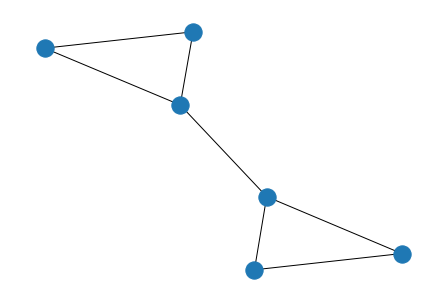

In [20]:
nx.draw(graph)

In [21]:
podzial = nx_comm.louvain_communities(graph)

In [30]:
podzial

[{0, 1, 2}, {3, 4, 5}]

In [42]:
import numpy as np
p = np.array(podzial)

In [51]:
[ e for e in p if 0 not in e ]

[{3, 4, 5}]

In [56]:
result = []
for el in p:
    if 0 not in el:
        result.append(el)
    else:
        w = set()
        for x in el:
            if x != 0:
                w.add(x)
        result.append(w)
                
        

In [57]:
result

[{1, 2}, {3, 4, 5}]

In [28]:
def cm(G, podzial, alpha):
    # oblicz modularity dla calego grafu 
    modularity_full = nx_comm.modularity(G, podzial)
    modularities = []
    for node in G.nodes:
        new_G = G.copy()
        print(f"before remove node: {node}")
        print(new_G.nodes)
        print(f"modularity: {modularity_full}")
        new_G.remove_node(node)
        print(f"after remove node: {node}")
        print(new_G.nodes)
        print(f"modularity without {node} element: { nx_comm.modularity(new_G, podzial) }")
    # oblicz nasza wielkosc dla calego grafu (mod przesunięte o alpha)
    nasza_wielkosc = modularity_full + alpha
    nasze_wyniki = []
    
    return modularity_full, nasza_wielkosc

In [29]:
cm(graph, podzial, 0.1)

before remove node: 0
[0, 1, 2, 3, 4, 5]
modularity: 0.35714285714285715
after remove node: 0
[1, 2, 3, 4, 5]


NotAPartition: Graph with 5 nodes and 5 edges is not a valid partition of the graph [{0, 1, 2}, {3, 4, 5}]

In [27]:
graph.nodes

NodeView((0, 1, 2, 3, 4, 5))

In [16]:
for el in range(len(graph.nodes)):
    print(el)
    a = graph.remove_node(el)
    
    print(a.nodes)

0


AttributeError: 'NoneType' object has no attribute 'nodes'

In [11]:
graph.remove_node(0)

In [12]:
graph.nodes

NodeView((1, 2, 3, 4, 5))

In [2]:
def cm(graph, comms, lam):

    return nx_comm.modularity(graph, comms) + lam*len(graph.nodes)

def compute_num(lam):
    
    graph = nx.barbell_graph(3,0)
    results = []
    nody = list(graph.nodes)
    ile = len(nody)
    while ile-1:
        podzial = nx_comm.louvain_communities(graph)
        nasza_wielkosc = cm(graph, podzial, lam)
        results.append(nasza_wielkosc)
        usun = -1*ile
        graph.remove_node(nody[usun])
        ile -= 1

    return results

In [3]:
[compute_num(x) for x in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]]

[[0.9571428571428573, 0.72, 0.4, 0.30000000000000004, 0.2],
 [1.5571428571428574, 1.22, 0.8, 0.6000000000000001, 0.4],
 [2.157142857142857, 1.72, 1.2, 0.8999999999999999, 0.6],
 [2.7571428571428576, 2.22, 1.6, 1.2000000000000002, 0.8],
 [3.357142857142857, 2.72, 2.0, 1.5, 1.0],
 [3.957142857142857, 3.22, 2.4, 1.7999999999999998, 1.2],
 [4.557142857142856, 3.72, 2.8, 2.0999999999999996, 1.4],
 [5.1571428571428575, 4.22, 3.2, 2.4000000000000004, 1.6],
 [5.757142857142857, 4.72, 3.6, 2.7, 1.8]]